In [14]:
import os
import warnings
import keras


from time import time

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# Import the libs for test split,KNN, svm and DecisionTree Classifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

# Import the libs for Tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow import feature_column
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import utils 
from yellowbrick.model_selection import LearningCurve


from ucimlrepo import fetch_ucirepo
from IPython.display import clear_output

matplotlib.use('agg')
%matplotlib inline

warnings.filterwarnings("ignore", category=UserWarning)

In [15]:
dry_bean = fetch_ucirepo(id=602)
# data (as pandas dataframes) 
X = dry_bean.data.features 
y = dry_bean.data.targets 
# metadata 
print(dry_bean.metadata) 

# variable information 
print(dry_bean.variables)

{'uci_id': 602, 'name': 'Dry Bean', 'repository_url': 'https://archive.ics.uci.edu/dataset/602/dry+bean+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/602/data.csv', 'abstract': 'Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 13611, 'num_features': 16, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Thu Mar 28 2024', 'dataset_doi': '10.24432/C50S4B', 'creators': [], 'intro_paper': {'title': 'Multiclass classification of dry beans using computer vision and machine learning techniques', 'authors': 'M. Koklu, Ilker Ali Özkan', 'published_in': 'Computers and Electronic

In [16]:
df = pd.concat([X, y], axis=1)
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [17]:
feature_columns = df.columns.to_numpy()[:-1]
X = df[feature_columns]
y = df['Class']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.2, random_state=142)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.2, random_state=42)


In [19]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_val_scaled = sc.fit_transform(X_val)
X_val = pd.DataFrame(X_val_scaled)

X_test_scaled = sc.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)



In [20]:
# Label Encode the data
lbl = LabelEncoder()
y_train_encoded = lbl.fit_transform(y_train)
y_val_encoded = lbl.fit_transform(y_val)
y_testencoded = lbl.fit_transform(y_test)
# one hot encode
y_train = to_categorical(y_train_encoded)
y_val = to_categorical(y_val_encoded)
y_test= to_categorical(y_test_encoded)

In [21]:
fractions = np.arange(.2,.8,.05)
n_samples = len(X_train)
subsets = []

for frac in fractions:
    size = int(frac * n_samples)
    indices = np.random.choice(len(X_train), size, replace=False)    
    X_subset = X_train.iloc[indices]
    '''
    print(indices)
    print(X_train.index)
    print(len(X_train))
    '''
    y_subset = y_train[indices]
    
    subsets.append((X_subset, y_subset))

In [18]:
'''
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, index=X_train.index)

X_train_partial = []
y_train_partial = []
for subset in subsets:
    X_train_partial_samples, y_train_partial_samples = subset
    X_train_partial_samples_scaled = sc.fit_transform(X_train_partial_samples)
    X_train_partial.append(pd.DataFrame(X_train_partial_samples_scaled))
'''


'\nsc = StandardScaler()\nX_train_scaled = sc.fit_transform(X_train)\nX_train = pd.DataFrame(X_train_scaled, index=X_train.index)\n\nX_train_partial = []\ny_train_partial = []\nfor subset in subsets:\n    X_train_partial_samples, y_train_partial_samples = subset\n    X_train_partial_samples_scaled = sc.fit_transform(X_train_partial_samples)\n    X_train_partial.append(pd.DataFrame(X_train_partial_samples_scaled))\n'

In [19]:
'''
x_ss = []
sc = StandardScaler()
for x in X_train_sample:
    x_ss.append(pd.DataFrame(sc.fit_transform(x),index=x.index))
'''

    

'\nx_ss = []\nsc = StandardScaler()\nfor x in X_train_sample:\n    x_ss.append(pd.DataFrame(sc.fit_transform(x),index=x.index))\n'

In [20]:
y_val

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [22]:
# Create the output dir
output_dir = '/tmp/logs'
os.makedirs(output_dir, exist_ok=True)
os.path.exists(output_dir)

True

In [24]:
class PlotLearning(keras.callbacks.Callback):
    """
    Callback to plot the learning curves of the model during training.
    """
    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []


    def on_epoch_end(self, epoch, logs={}):
        # Storing metrics
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]

        # Plotting
        metrics = [x for x in logs if 'val' not in x]

        f, axs = plt.subplots(1, len(metrics), figsize=(15,5))
        clear_output(wait=True)

        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch + 2),
                        self.metrics[metric],
                        label=metric, color='red')
            if logs['val_' + metric]:
                axs[i].plot(range(1, epoch + 2),
                            self.metrics['val_' + metric],
                            label='val_' + metric)

            axs[i].legend()
            axs[i].grid()

        plt.tight_layout()
        plt.show()

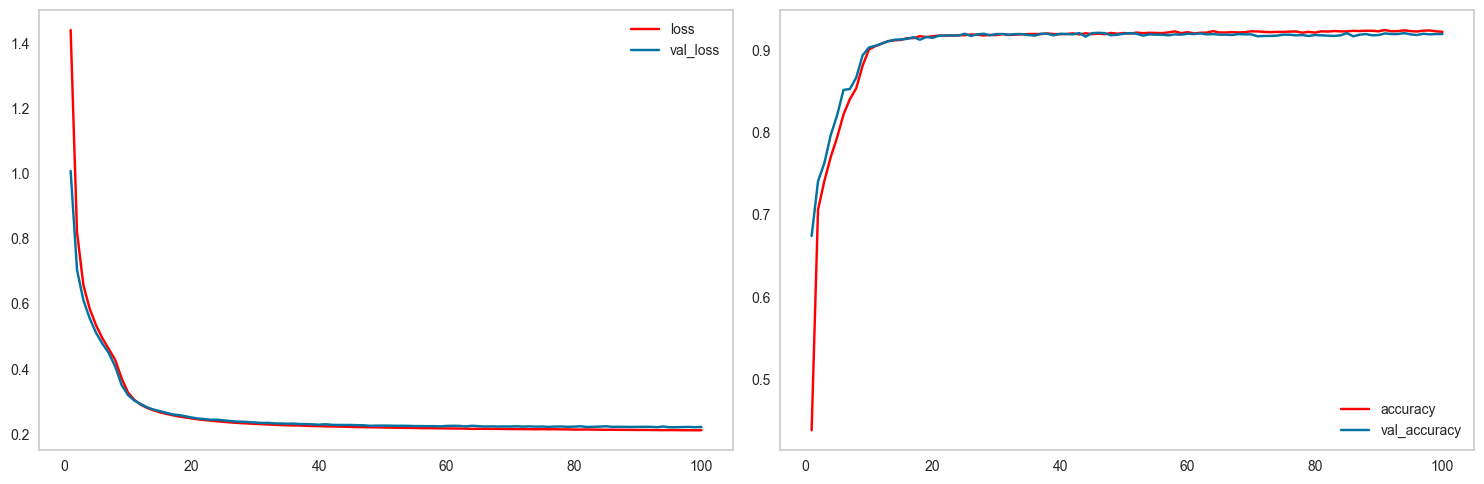

324/324 [==============================] - 1s 3ms/step - loss: 0.2127 - accuracy: 0.9230 - val_loss: 0.2226 - val_accuracy: 0.9203


In [36]:
callbacks_list = [PlotLearning(), TensorBoard(log_dir=output_dir)]
#callbacks_list = [TensorBoard(log_dir=output_dir)]

# Build the model
utils.set_random_seed(812)
epoch = 100
model = Sequential([
    Dense(units=4, activation='relu', input_shape = (X_train.shape[1],)),
    Dense(units=7, activation='softmax')
    ])
#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and capture the training history
history = model.fit(X_train, y_train, epochs=epoch, validation_data=(X_val, y_val), batch_size=32, callbacks=callbacks_list)

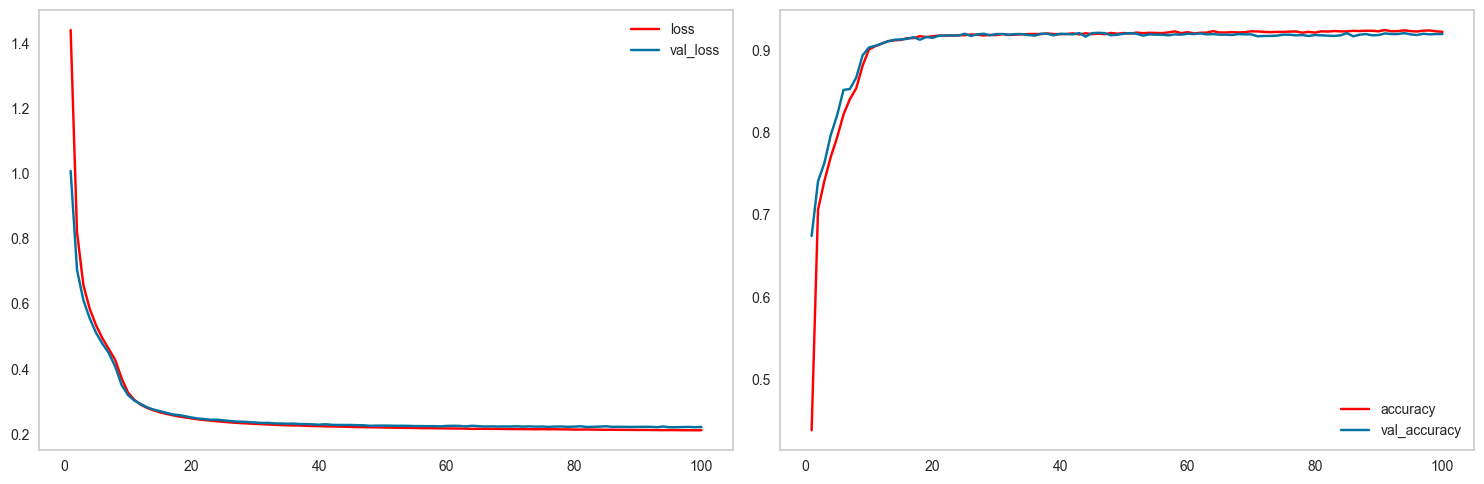

324/324 [==============================] - 1s 4ms/step - loss: 0.2127 - accuracy: 0.9230 - val_loss: 0.2226 - val_accuracy: 0.9203


In [37]:
callbacks_list = [PlotLearning(), TensorBoard(log_dir=output_dir)]
#callbacks_list = [TensorBoard(log_dir=output_dir)]

# Build the model
utils.set_random_seed(812)
epoch = 100
model = Sequential([
    Dense(units=4, activation='relu', input_shape = (X_train.shape[1],)),
    Dense(units=7, activation='softmax')
    ])
#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and capture the training history
history = model.fit(X_train, y_train, epochs=epoch, validation_data=(X_val, y_val), batch_size=32, callbacks=callbacks_list)

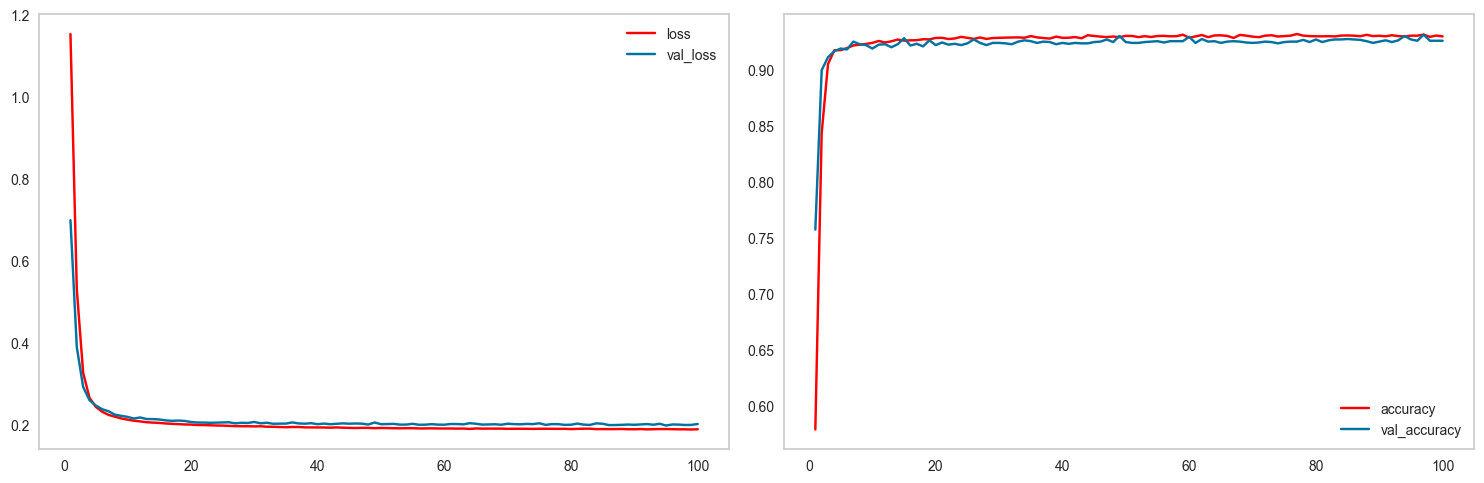

324/324 [==============================] - 1s 4ms/step - loss: 0.1881 - accuracy: 0.9292 - val_loss: 0.2010 - val_accuracy: 0.9254


In [133]:
callbacks_list = [PlotLearning(), TensorBoard(log_dir=output_dir)]
#callbacks_list = [TensorBoard(log_dir=output_dir)]

# Build the model
utils.set_random_seed(812)
epoch = 100
model = Sequential([
    Dense(units=16, activation='relu', input_shape = (X_train.shape[1],)),
    Dense(units=7, activation='softmax')
    ])
#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and capture the training history
history = model.fit(X_train, y_train, epochs=epoch, validation_data=(X_val, y_val), batch_size=32, callbacks=callbacks_list)

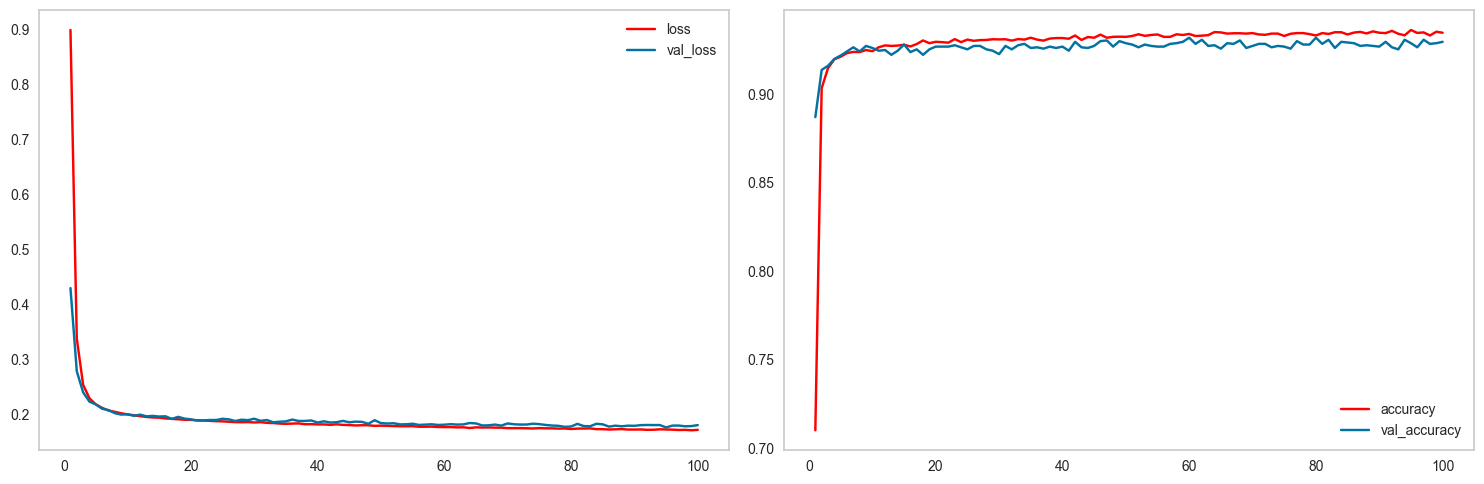

324/324 [==============================] - 1s 4ms/step - loss: 0.1723 - accuracy: 0.9347 - val_loss: 0.1810 - val_accuracy: 0.9296


In [134]:
callbacks_list = [PlotLearning(), TensorBoard(log_dir=output_dir)]
#callbacks_list = [TensorBoard(log_dir=output_dir)]

# Build the model
utils.set_random_seed(812)
epoch = 100
model = Sequential([
    Dense(units=32, activation='relu', input_shape = (X_train.shape[1],)),
    Dense(units=7, activation='softmax')
    ])
#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and capture the training history
history = model.fit(X_train, y_train, epochs=epoch, validation_data=(X_val, y_val), batch_size=32, callbacks=callbacks_list)

In [27]:
loss, accuracy = model.evaluate(X_test, y_test)

ValueError: in user code:

    File "/Users/kjoshi/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/keras/src/engine/training.py", line 1972, in test_function  *
        return step_function(self, iterator)
    File "/Users/kjoshi/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/keras/src/engine/training.py", line 1956, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/kjoshi/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/keras/src/engine/training.py", line 1944, in run_step  **
        outputs = model.test_step(data)
    File "/Users/kjoshi/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/keras/src/engine/training.py", line 1852, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/kjoshi/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/keras/src/engine/training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "/Users/kjoshi/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/keras/src/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/kjoshi/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/keras/src/losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/kjoshi/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/keras/src/losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/kjoshi/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/keras/src/losses.py", line 2122, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/Users/kjoshi/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/keras/src/backend.py", line 5560, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 7) are incompatible


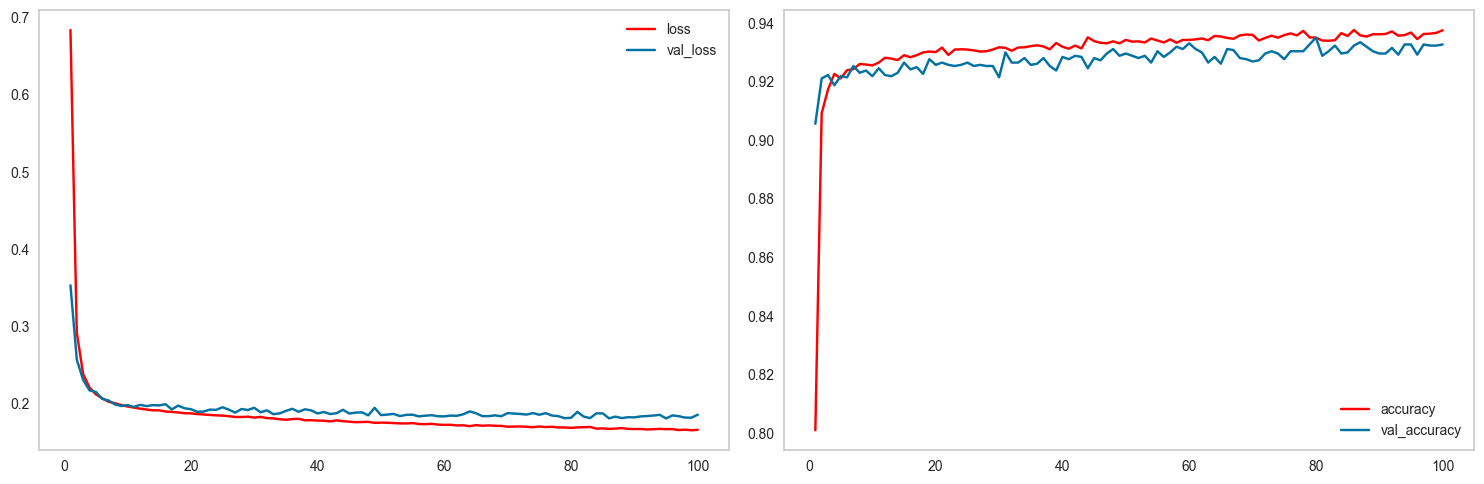

324/324 [==============================] - 1s 3ms/step - loss: 0.1655 - accuracy: 0.9375 - val_loss: 0.1851 - val_accuracy: 0.9327


In [25]:
callbacks_list = [PlotLearning(), TensorBoard(log_dir=output_dir)]
#callbacks_list = [TensorBoard(log_dir=output_dir)]

# Build the model
utils.set_random_seed(812)
epoch = 100
model = Sequential([
    Dense(units=50, activation='relu', input_shape = (X_train.shape[1],)),
    Dense(units=7, activation='softmax')
    ])
#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and capture the training history
history = model.fit(X_train, y_train, epochs=epoch, validation_data=(X_val, y_val), batch_size=32, callbacks=callbacks_list)

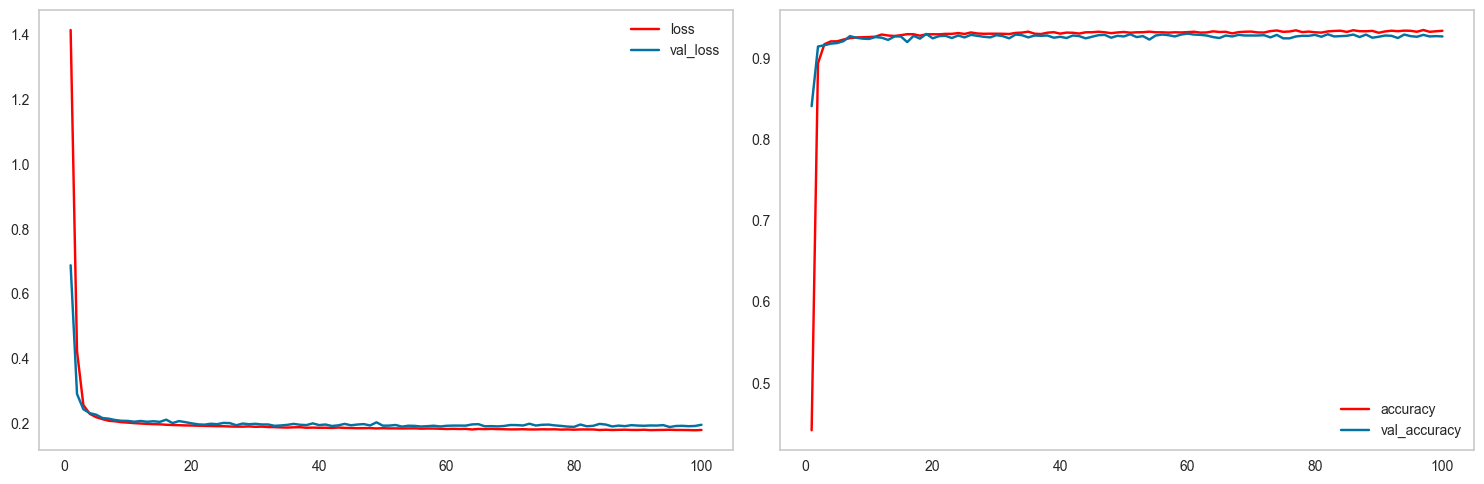

324/324 [==============================] - 1s 3ms/step - loss: 0.1798 - accuracy: 0.9339 - val_loss: 0.1958 - val_accuracy: 0.9269


In [136]:
callbacks_list = [PlotLearning(), TensorBoard(log_dir=output_dir)]
#callbacks_list = [TensorBoard(log_dir=output_dir)]

# Build the model
utils.set_random_seed(812)
epoch = 100
model = Sequential([
    Dense(units=16, activation='relu', input_shape = (X_train.shape[1],)),
    Dense(units=10, activation='relu'),
    Dense(units=7, activation='softmax')
    ])
#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and capture the training history
history = model.fit(X_train, y_train, epochs=epoch, validation_data=(X_val, y_val), batch_size=32, callbacks=callbacks_list)

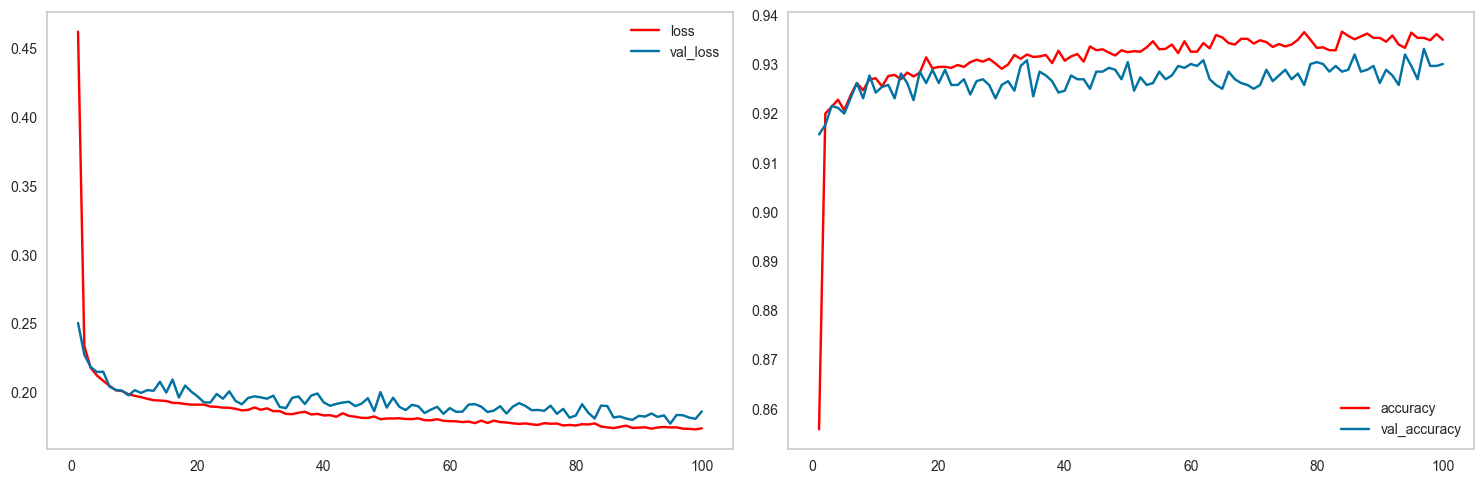

324/324 [==============================] - 1s 3ms/step - loss: 0.1736 - accuracy: 0.9349 - val_loss: 0.1859 - val_accuracy: 0.9300


In [139]:
callbacks_list = [PlotLearning(), TensorBoard(log_dir=output_dir)]
#callbacks_list = [TensorBoard(log_dir=output_dir)]

# Build the model
utils.set_random_seed(812)
epoch = 100
model = Sequential([
    Dense(units=32, activation='relu', input_shape = (X_train.shape[1],)),
    Dense(units=7, activation='softmax')
    ])
#Compile the model
sgd_optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and capture the training history
history = model.fit(X_train, y_train, epochs=epoch, validation_data=(X_val, y_val), batch_size=32, callbacks=callbacks_list)

In [28]:
# Get the 20,40,60,80 % of training data and plot.
def create_subsets():
    subsets = []
    fractions = [0.2, 0.4, 0.6, 0.8]
    n_samples = len(X_train)
    subsets = []
    for frac in fractions:
        print(f'frac = {frac}')
        size = int(frac * n_samples)
        indices = np.random.choice(len(X_train), size, replace=False)
        X_subset = X_train.iloc[indices]
        y_subset = y_train[indices]
        subsets.append((X_subset, y_subset))
    return subsets

subsets = create_subsets()
for subset in subsets:
    print(len(subset[0]), len(subset[1]))
subsets[0][1]

frac = 0.2
frac = 0.4
frac = 0.6
frac = 0.8
2068 2068
4137 4137
6206 6206
8275 8275


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [10]:
# model
def model(X_train, y_train):
    callbacks_list = [PlotLearning(), TensorBoard(log_dir=output_dir)]
    #callbacks_list = [TensorBoard(log_dir=output_dir)]

    # Build the model
    utils.set_random_seed(812)
    epoch = 100
    model_obj = Sequential([
        Dense(units=50, activation='relu', input_shape = (X_train.shape[1],)),
        Dense(units=7, activation='softmax')
        ])
    #Compile the model
    model_obj.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model and capture the training history
    #history = model.fit(X_train, y_train, epochs=epoch, validation_data=(X_val, y_val), batch_size=32, callbacks=callbacks_list)
    history = model_obj.fit(X_train, y_train, epochs=epoch, validation_data=(X_val, y_val), batch_size=32)
    return history, model_obj


In [11]:
history, model_obj = model(X_test, y_test)
loss, accuracy = model_obj.evaluate(X_test, y_test)


NameError: name 'X_test' is not defined

In [30]:
histories = list()
for subset in subsets:
    history = model(subset[0], subset[1])
    histories.append(history)

    

Epoch 1/100
65/65 [==============================] - 1s 7ms/step - loss: 1.2494 - accuracy: 0.5909 - val_loss: 0.9187 - val_accuracy: 0.7347
Epoch 2/100
65/65 [==============================] - 0s 3ms/step - loss: 0.7587 - accuracy: 0.7848 - val_loss: 0.6497 - val_accuracy: 0.8221
Epoch 3/100
65/65 [==============================] - 0s 3ms/step - loss: 0.5554 - accuracy: 0.8530 - val_loss: 0.5017 - val_accuracy: 0.8751
Epoch 4/100
65/65 [==============================] - 0s 3ms/step - loss: 0.4421 - accuracy: 0.8806 - val_loss: 0.4163 - val_accuracy: 0.8944
Epoch 5/100
65/65 [==============================] - 0s 3ms/step - loss: 0.3724 - accuracy: 0.8980 - val_loss: 0.3609 - val_accuracy: 0.8998
Epoch 6/100
65/65 [==============================] - 0s 3ms/step - loss: 0.3267 - accuracy: 0.9018 - val_loss: 0.3233 - val_accuracy: 0.9060
Epoch 7/100
65/65 [==============================] - 0s 5ms/step - loss: 0.2959 - accuracy: 0.9105 - val_loss: 0.2979 - val_accuracy: 0.9114
Epoch 8/100
6

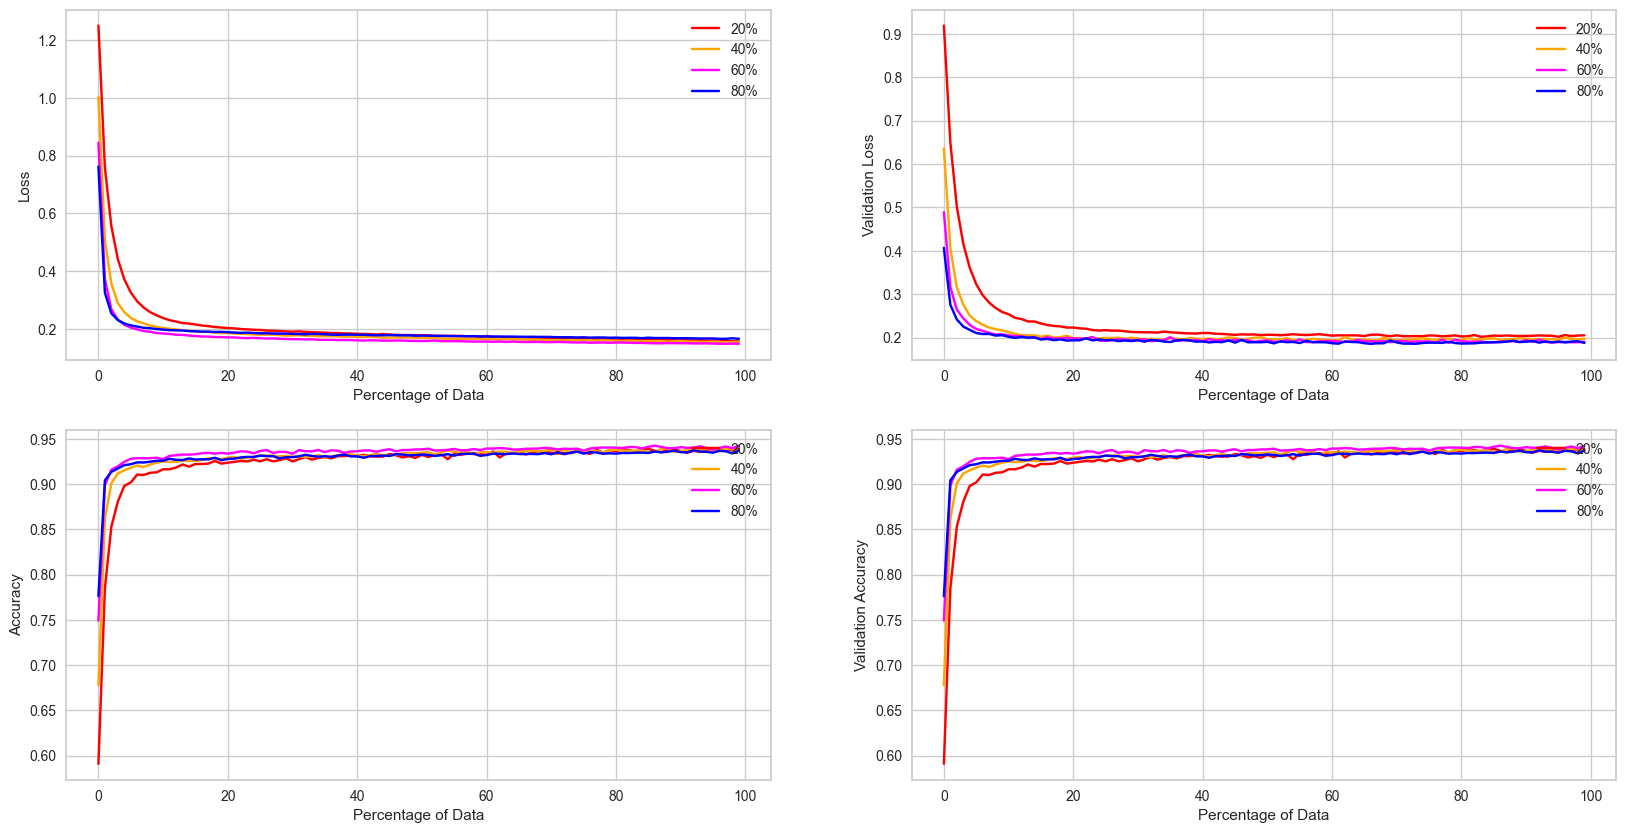

In [35]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))


axes[0,0].plot(histories[0].history['loss'],color='red',label='20%')
axes[0,0].plot(histories[1].history['loss'],color='orange',label='40%')
axes[0,0].plot(histories[2].history['loss'],color='magenta',label='60%')
axes[0,0].plot(histories[3].history['loss'],color='blue',label='80%')
axes[0,0].set_xlabel("Percentage of Data")
axes[0,0].set_ylabel("Loss")
axes[0,0].legend(loc="upper right")

axes[0,1].plot(histories[0].history['val_loss'],color='red',label='20%')
axes[0,1].plot(histories[1].history['val_loss'],color='orange',label='40%')
axes[0,1].plot(histories[2].history['val_loss'],color='magenta',label='60%')
axes[0,1].plot(histories[3].history['val_loss'],color='blue',label='80%')
axes[0,1].set_xlabel("Percentage of Data")
axes[0,1].set_ylabel("Validation Loss")
axes[0,1].legend(loc="upper right")

axes[1,0].plot(histories[0].history['accuracy'],color='red',label='20%')
axes[1,0].plot(histories[1].history['accuracy'],color='orange',label='40%')
axes[1,0].plot(histories[2].history['accuracy'],color='magenta',label='60%')
axes[1,0].plot(histories[3].history['accuracy'],color='blue',label='80%')
axes[1,0].set_xlabel("Percentage of Data")
axes[1,0].set_ylabel("Accuracy")
axes[1,0].legend(loc="upper right")

axes[1,1].plot(histories[0].history['accuracy'],color='red',label='20%')
axes[1,1].plot(histories[1].history['accuracy'],color='orange',label='40%')
axes[1,1].plot(histories[2].history['accuracy'],color='magenta',label='60%')
axes[1,1].plot(histories[3].history['accuracy'],color='blue',label='80%')
axes[1,1].set_xlabel("Percentage of Data")
axes[1,1].set_ylabel("Validation Accuracy")
axes[1,1].legend(loc="upper right")

In [372]:
def get_accuracy(x_train, y_train, k=11):
    model=model(k)
    model.fit(x_train,y_train)
    prediction=model.predict(X_val)
    acc = accuracy_score(prediction,y_val)
    return acc

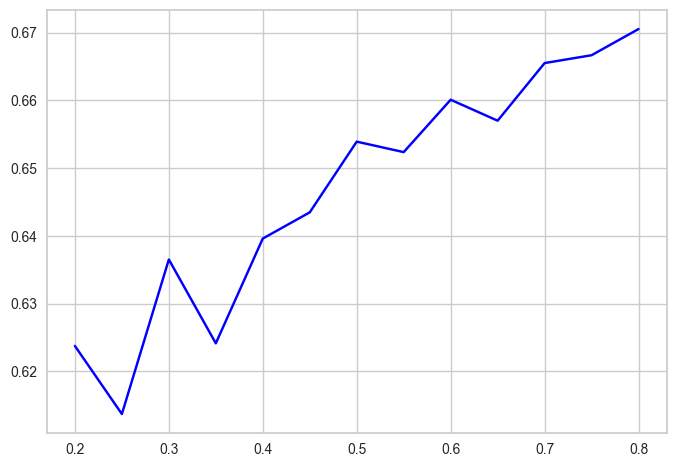

In [393]:
acc_partial = []
for subset in subsets:
    X_train, y_train = subset
    acc_partial.append(get_accuracy(X_train, y_train))
plt.plot(fractions, acc_partial, color='blue')
#plt.xticks(k_range)
plt.xlabel("Fraction of training")
plt.ylabel("Accuracy")
#plt.show()


In [158]:
print(len(X_train_20_sampled), len(y_train_20_sampled))
print(len(X_train_40_sampled), len(y_train_40_sampled))
print(len(X_train_60_sampled), len(y_train_60_sampled))
print(len(X_train_80_sampled), len(y_train_80_sampled))

2068 2068
4137 4137
6206 6206
8275 8275


In [175]:
for i in range(len(y_train_sample)):
    print(get_accuracy(x_ss[i], y_train_sample[i]))

0.5324825986078886
0.545630317092034
0.5274555297757154
0.5471771075019335
0.5421500386697602
0.54292343387471
0.5433101314771849
0.5479505027068832


In [159]:
print(get_accuracy(X_train_20_sampled, y_train_20_sampled))
print(get_accuracy(X_train_40_sampled, y_train_40_sampled))
print(get_accuracy(X_train_60_sampled, y_train_60_sampled))
print(get_accuracy(X_train_80_sampled, y_train_80_sampled))
'''
plt.plot(k_range, val_20, color='green',label='20')
plt.plot(k_range, val_40, color='blue',label='40')
plt.plot(k_range, val_60, color='red',label='60')
plt.plot(k_range, val_80, color='black',label='80')
plt.legend(loc='upper right')
plt.xticks(k_range)
plt.xlabel("Percentage")
plt.ylabel("Accuracy")
'''

0.5324825986078886
0.5274555297757154
0.5421500386697602
0.5433101314771849


'\nplt.plot(k_range, val_20, color=\'green\',label=\'20\')\nplt.plot(k_range, val_40, color=\'blue\',label=\'40\')\nplt.plot(k_range, val_60, color=\'red\',label=\'60\')\nplt.plot(k_range, val_80, color=\'black\',label=\'80\')\nplt.legend(loc=\'upper right\')\nplt.xticks(k_range)\nplt.xlabel("Percentage")\nplt.ylabel("Accuracy")\n'

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Assuming X_train and y_train are your features and labels for the training data

# Define the parameter grid for k values
param_grid = {'n_neighbors': range(1, 21)}  # Search for k from 1 to 20

for i in range(1, 100, 2):
    # Create a k-Nearest Neighbors classifier
    knn = KNeighborsClassifier()

    # Perform grid search to find the best k value
    grid_search.fit(X_train, y_train)

# Print the best k value and its corresponding accuracy score
print("Best k:", grid_search.best_params_['n_neighbors'])
print("Best accuracy:", grid_search.best_score_)

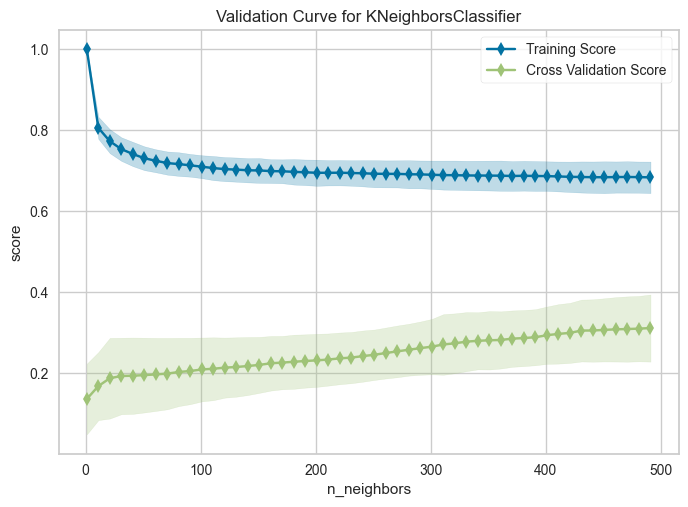

<Axes: title={'center': 'Validation Curve for KNeighborsClassifier'}, xlabel='n_neighbors', ylabel='score'>

In [68]:
from yellowbrick.model_selection import ValidationCurve
#cv = StratifiedKFold(4)
param_range = range(1,500,10)
oz = ValidationCurve(
    KNeighborsClassifier(), param_name="n_neighbors",
    #param_range=param_range, cv=cv, scoring="accuracy", n_jobs=4,
    param_range=param_range, scoring="accuracy",
)
oz.fit(X, y)
oz.show()

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Assuming X_train and y_train are your features and labels for the training data

# Define the parameter grid for k values
param_grid = {'n_neighbors': range(1, 21)}  # Search for k from 1 to 20

# Create a k-Nearest Neighbors classifier
knn = KNeighborsClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Perform grid search to find the best k value
grid_search.fit(X_train, y_train)

# Print the best k value and its corresponding accuracy score
print("Best k:", grid_search.best_params_['n_neighbors'])
print("Best accuracy:", grid_search.best_score_)

Best k: 16
Best accuracy: 0.9262367564666958


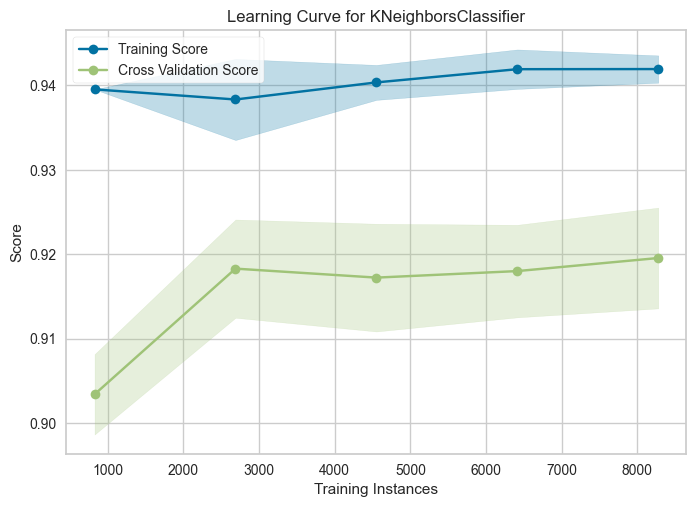

<Axes: title={'center': 'Learning Curve for KNeighborsClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [62]:
# Create a k-Nearest Neighbors classifier
model = KNeighborsClassifier(n_neighbors=5)

# Create a LearningCurve visualizer
visualizer = LearningCurve(model, scoring='accuracy')

# Fit and visualize the learning curve
visualizer.fit(X_train, y_train)
visualizer.show()

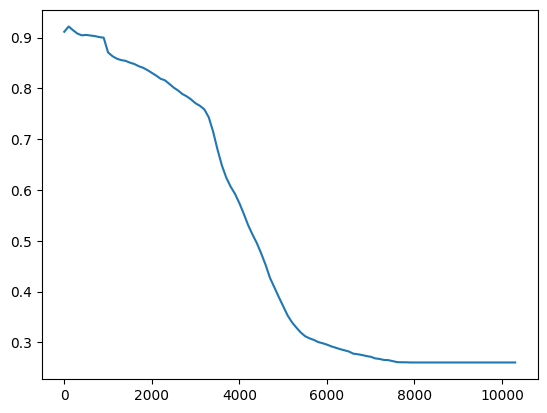

In [201]:
param_range = range(1,10302, 100)

plt.plot(param_range,result)
#plt.xticks(param_range)

In [218]:
print(len(X_val))
print(len(y_val))
from collections import Counter
Counter(y_train)
#Counter(y_val)
prediction


2586
2586


array([3, 3, 3, ..., 3, 3, 3])

In [243]:
y_train_1 = to_categorical(y_train)
y_val_1 = to_categorical(y_val)


In [245]:
utils.set_random_seed(812)
epoch = 500
#CHange the layers or neurons
model = Sequential([
    Dense(units=4, activation='relu', input_shape = (X_train.shape[1],)),
    Dense(units=5, activation='relu'),
    Dense(units=7, activation='softmax')
    ])
#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and capture the training history
#history = model.fit(X_train, y_train, epochs=epoch, validation_data=(X_val, y_val), batch_size=32)
history = model.fit(X_train, y_train_1, epochs=epoch, validation_data=(X_val, y_val_1))



Epoch 1/500
324/324 [==============================] - 2s 3ms/step - loss: 1.5231 - accuracy: 0.3860 - val_loss: 1.0518 - val_accuracy: 0.5317
Epoch 2/500
324/324 [==============================] - 1s 2ms/step - loss: 0.9211 - accuracy: 0.5970 - val_loss: 0.8266 - val_accuracy: 0.6651
Epoch 3/500
324/324 [==============================] - 1s 2ms/step - loss: 0.7489 - accuracy: 0.7278 - val_loss: 0.6545 - val_accuracy: 0.8043
Epoch 4/500
324/324 [==============================] - 1s 2ms/step - loss: 0.5482 - accuracy: 0.8475 - val_loss: 0.4626 - val_accuracy: 0.8623
Epoch 5/500
324/324 [==============================] - 1s 2ms/step - loss: 0.4174 - accuracy: 0.8683 - val_loss: 0.3785 - val_accuracy: 0.8770
Epoch 6/500
324/324 [==============================] - 1s 2ms/step - loss: 0.3643 - accuracy: 0.8777 - val_loss: 0.3446 - val_accuracy: 0.8840
Epoch 7/500
324/324 [==============================] - 1s 2ms/step - loss: 0.3384 - accuracy: 0.8855 - val_loss: 0.3291 - val_accuracy: 0.8921

Epoch 58/500
324/324 [==============================] - 1s 2ms/step - loss: 0.2091 - accuracy: 0.9235 - val_loss: 0.2137 - val_accuracy: 0.9246
Epoch 59/500
324/324 [==============================] - 1s 2ms/step - loss: 0.2088 - accuracy: 0.9242 - val_loss: 0.2174 - val_accuracy: 0.9234
Epoch 60/500
324/324 [==============================] - 1s 2ms/step - loss: 0.2086 - accuracy: 0.9253 - val_loss: 0.2122 - val_accuracy: 0.9227
Epoch 61/500
324/324 [==============================] - 1s 2ms/step - loss: 0.2081 - accuracy: 0.9256 - val_loss: 0.2110 - val_accuracy: 0.9250
Epoch 62/500
324/324 [==============================] - 1s 2ms/step - loss: 0.2076 - accuracy: 0.9261 - val_loss: 0.2128 - val_accuracy: 0.9242
Epoch 63/500
324/324 [==============================] - 1s 2ms/step - loss: 0.2074 - accuracy: 0.9253 - val_loss: 0.2116 - val_accuracy: 0.9246
Epoch 64/500
324/324 [==============================] - 1s 2ms/step - loss: 0.2065 - accuracy: 0.9252 - val_loss: 0.2107 - val_accuracy:

Epoch 115/500
324/324 [==============================] - 1s 2ms/step - loss: 0.2014 - accuracy: 0.9270 - val_loss: 0.2073 - val_accuracy: 0.9273
Epoch 116/500
324/324 [==============================] - 1s 3ms/step - loss: 0.2014 - accuracy: 0.9269 - val_loss: 0.2067 - val_accuracy: 0.9261
Epoch 117/500
324/324 [==============================] - 1s 2ms/step - loss: 0.2008 - accuracy: 0.9269 - val_loss: 0.2085 - val_accuracy: 0.9238
Epoch 118/500
324/324 [==============================] - 1s 2ms/step - loss: 0.2006 - accuracy: 0.9270 - val_loss: 0.2103 - val_accuracy: 0.9281
Epoch 119/500
324/324 [==============================] - 1s 2ms/step - loss: 0.2007 - accuracy: 0.9272 - val_loss: 0.2073 - val_accuracy: 0.9273
Epoch 120/500
324/324 [==============================] - 1s 2ms/step - loss: 0.2004 - accuracy: 0.9279 - val_loss: 0.2074 - val_accuracy: 0.9265
Epoch 121/500
324/324 [==============================] - 1s 2ms/step - loss: 0.2011 - accuracy: 0.9269 - val_loss: 0.2072 - val_ac

324/324 [==============================] - 1s 2ms/step - loss: 0.1980 - accuracy: 0.9270 - val_loss: 0.2122 - val_accuracy: 0.9277
Epoch 228/500
324/324 [==============================] - 1s 2ms/step - loss: 0.1977 - accuracy: 0.9279 - val_loss: 0.2138 - val_accuracy: 0.9242
Epoch 229/500
324/324 [==============================] - 1s 2ms/step - loss: 0.1984 - accuracy: 0.9282 - val_loss: 0.2067 - val_accuracy: 0.9273
Epoch 230/500
324/324 [==============================] - 1s 2ms/step - loss: 0.1984 - accuracy: 0.9289 - val_loss: 0.2113 - val_accuracy: 0.9242
Epoch 231/500
324/324 [==============================] - 1s 2ms/step - loss: 0.1991 - accuracy: 0.9291 - val_loss: 0.2071 - val_accuracy: 0.9258
Epoch 232/500
324/324 [==============================] - 1s 2ms/step - loss: 0.1982 - accuracy: 0.9281 - val_loss: 0.2079 - val_accuracy: 0.9254
Epoch 233/500
324/324 [==============================] - 1s 2ms/step - loss: 0.1982 - accuracy: 0.9285 - val_loss: 0.2061 - val_accuracy: 0.9296

324/324 [==============================] - 1s 2ms/step - loss: 0.1971 - accuracy: 0.9289 - val_loss: 0.2085 - val_accuracy: 0.9265
Epoch 340/500
324/324 [==============================] - 1s 2ms/step - loss: 0.1975 - accuracy: 0.9274 - val_loss: 0.2133 - val_accuracy: 0.9258
Epoch 341/500
324/324 [==============================] - 1s 2ms/step - loss: 0.1967 - accuracy: 0.9296 - val_loss: 0.2117 - val_accuracy: 0.9265
Epoch 342/500
324/324 [==============================] - 1s 2ms/step - loss: 0.1966 - accuracy: 0.9292 - val_loss: 0.2073 - val_accuracy: 0.9250
Epoch 343/500
324/324 [==============================] - 1s 2ms/step - loss: 0.1970 - accuracy: 0.9279 - val_loss: 0.2073 - val_accuracy: 0.9285
Epoch 344/500
324/324 [==============================] - 1s 2ms/step - loss: 0.1969 - accuracy: 0.9289 - val_loss: 0.2071 - val_accuracy: 0.9277
Epoch 345/500
324/324 [==============================] - 1s 2ms/step - loss: 0.1963 - accuracy: 0.9288 - val_loss: 0.2085 - val_accuracy: 0.9281

324/324 [==============================] - 1s 3ms/step - loss: 0.1958 - accuracy: 0.9277 - val_loss: 0.2085 - val_accuracy: 0.9277
Epoch 452/500
324/324 [==============================] - 1s 3ms/step - loss: 0.1953 - accuracy: 0.9285 - val_loss: 0.2078 - val_accuracy: 0.9258
Epoch 453/500
324/324 [==============================] - 1s 3ms/step - loss: 0.1959 - accuracy: 0.9283 - val_loss: 0.2080 - val_accuracy: 0.9288
Epoch 454/500
324/324 [==============================] - 1s 3ms/step - loss: 0.1952 - accuracy: 0.9293 - val_loss: 0.2099 - val_accuracy: 0.9254
Epoch 455/500
324/324 [==============================] - 1s 3ms/step - loss: 0.1958 - accuracy: 0.9282 - val_loss: 0.2063 - val_accuracy: 0.9281
Epoch 456/500
324/324 [==============================] - 1s 3ms/step - loss: 0.1959 - accuracy: 0.9288 - val_loss: 0.2063 - val_accuracy: 0.9292
Epoch 457/500
324/324 [==============================] - 1s 3ms/step - loss: 0.1960 - accuracy: 0.9270 - val_loss: 0.2092 - val_accuracy: 0.9281

In [5]:
from keras.wrappers.scikit_learn import KerasClassifier

# Define the Keras model
def create_model(optimizer='adam', activation='relu', neurons=16):
    model = Sequential()
    model.add(Dense(neurons, input_dim=4, activation=activation))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Wrap the Keras model with KerasClassifier
keras_classifier = KerasClassifier(build_fn=create_model, verbose=0)

# Define the parameter grid
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'tanh'],
    'neurons': [8, 16, 32]
}

# Use GridSearchCV
grid_search = GridSearchCV(keras_classifier, param_grid, cv=3, scoring='accuracy')

# Fit the GridSearchCV object to your data
grid_search.fit(X_train, y_train)

# Retrieve the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)

ModuleNotFoundError: No module named 'keras.wrappers'